In [22]:
import numpy as np
import pandas as pd
import csv 
import matplotlib.pyplot as plt

import sys 
sys.path.append('/home/lucas/Documents/Log_Analysis')

from analog import logextract as logextract, logscore as logscore

# Scores Review

In [23]:
# for logs imported with QGC
log_path = '/home/lucas/Documents/Log_Analysis/Logs'
log_index = '38'
log_date = '2019-8-27'
log_time = '14-18-14'
log_file = f'{log_path}/log_{log_index}_{log_date}-{log_time}.ulg'
# log_file = f'{log_path}/{log_time}.ulg'
print(log_file)

/home/lucas/Documents/Log_Analysis/Logs/log_38_2019-8-27-14-18-14.ulg


In [24]:
topic_list = 'sensor_combined'
info = logextract(log_file, topic_list)
scores = logscore(info)

acc score : 0.8711091456534296
peak score :0.9997179226401711
hf score : 0.4387683800624556


# Scores Statistics

In [25]:
path2csv = 'log_scores.csv'

try:
    csv_file = open(path2csv)
except IOError: 
    print(f'The file {path2csv} does not exist or is not readable. Please verify the path.')
    
   

reader = csv.DictReader(csv_file)

acc_score = []
peak_score = []
hf_score = []
for line in reader:
    acc_score.append(float(line['Acc score']))
    peak_score.append(float(line['Peak score']))
    hf_score.append(float(line['HF score']))


In [26]:
acc_bins = np.arange(0.6,1,0.02)

for k in range(len(acc_bins)):
    if scores["acc_score"] < acc_bins[k+1]:
        print(k)
        bin_index = k
        break

13


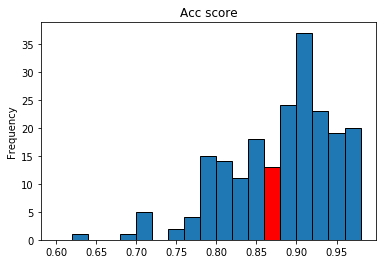

In [27]:
plt.figure()
pdrpm = pd.Series(acc_score)
hist = pdrpm.plot(kind='hist',density=False,bins=acc_bins,edgecolor='k',title='Acc score')
hist.patches[bin_index].set_facecolor('r') # the bin in which the current file average falls is highlighted

In [28]:
step = .0005
peak_bins = np.arange(0.98,1+step,step)

for k in range(len(peak_bins)):
    if scores["peak_score"] < peak_bins[k]+step:
        print(k)
        bin_index = k
        break
        
len(peak_bins)

39


41

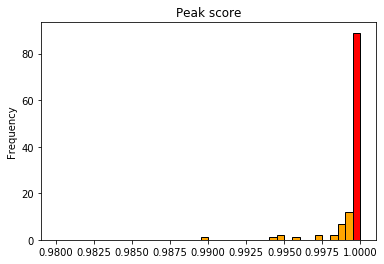

In [29]:
plt.figure()
pdrpm = pd.Series(peak_score)
hist = pdrpm.plot(kind='hist',density=False,bins=peak_bins,edgecolor='k',color='orange',title='Peak score')
hist.patches[bin_index].set_facecolor('r') # the bin in which the current file average falls is highlighted

In [30]:
hf_bins = np.arange(0.35,0.5,.002)

for k in range(len(hf_bins)):
    if scores["hf_score"] < hf_bins[k+1]:
        print(k)
        bin_index = k
        break

44


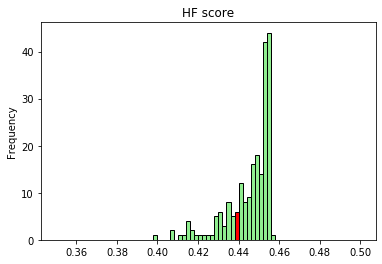

In [31]:
plt.figure()
pdrpm = pd.Series(hf_score)
hist = pdrpm.plot(kind='hist',density=False,bins=hf_bins,edgecolor='k',color='lightgreen',title='HF score')
hist.patches[bin_index].set_facecolor('r') # the bin in which the current file average falls is highlighted